# Aula 03: Regressão linear (parte 2)

**Objetivos:**

1. Generalizar os métodos de regressão linear para o caso multivariado;
2. Investigar extensões do método, incluindo regressão polinomial e *feature scaling*;

**Exercícios:**

- Exercício 1: Preparação dos dados
- Exercício 2: Regressão linear com várias variáveis - método do gradiente
- Exercício 3: Regressão linear com várias variáveis - scikit-learn
- Exercício 4: Reescalonamento
- Exercício 5: Taxa de aprendizado
- Exercício 6: Regressão polinomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Revisão teórica ✅

A notação generalizada está listada na tabela abaixo:

| Symbol | Meaning | Example/Code |
|--------|---------|--------------|
| $a$ | scalar, non bold | |
| $\mathbf{a}$ | vector, bold | |
| $\mathbf{A}$ | matrix, bold capital | |
| $\mathbf{X}$ | training example matrix | `X_train` |
| $\mathbf{y}$ | training example targets | `y_train` |
| $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ training example | `X[i]`, `y[i]` |
| $m$ | number of training examples | `m` |
| $n$ | number of features in each example | `n` |
| $\mathbf{w}$ | parameter: weight | `w` |
| $b$ | parameter: bias | `b` |
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | Model evaluation at $\mathbf{x}^{(i)}$, parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$ | `f_wb` |

<br>
A principal diferença com relação ao caso de regressão linear univariada consiste na forma do conjunto de preditores. Neste caso anterior, há somente uma *feature*. Logo, se há $m$ entradas no conjunto de treinamento, os preditores formam um vetor de comprimento $m$. Já agora, se cada exemplo de treinamento possui $n$ *features*, os preditores formam uma matriz $m \times n$:

<br>
<br>

$$\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
\tag{5}
$$
<br>
Isto também implica que o modelo linear agora possui **um vetor de parâmetros** $\mathbf{w}$:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  \mathbf{w} \cdot \mathbf{x} + b = w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{6}$$


### Método do gradiente com várias variáveis

_Mudar notação para o caso vetorial_


Considere um conjunto de treino $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=0}^{m-1}$, em que
$\mathbf{x}^{(i)} \in \mathbb{R}^n$ é o vetor de $n$ preditores do exemplo $i$ e
$\mathbf{w}\in\mathbb{R}^n$ é o vetor de pesos. O modelo linear é

$$
f_{\mathbf{w},b}(\mathbf{x}^{(i)}) \;=\; \mathbf{w}^\top \mathbf{x}^{(i)} + b \tag{1}
$$

A *função de custo* escolhida (erro quadrático médio) minimiza a soma dos erros ao quadrado entre as previsões e os alvos:

$$
J(\mathbf{w}, b) \;=\; \frac{1}{2m}\sum_{i=0}^{m-1} \big(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}\big)^2 \tag{2}
$$

O *gradiente descendente* atualiza iterativamente $\mathbf{w}$ e $b$ na direção oposta ao gradiente de $J$:

O método do *gradiente descendente* consiste em atualizar iterativamente os valores de $w$ e $b$ usando os valores das derivadas parciais da função de custo:

$$
\begin{align}
\mathbf{w} &= \mathbf{w} - \alpha\, \nabla_{\mathbf{w}} J(\mathbf{w}, b) \tag{3a}\\
b          &= b          - \alpha\, \frac{\partial J(\mathbf{w}, b)}{\partial b} \tag{3b}
\end{align}
$$

com os valores dos parâmetros $w$ $b$ sendo atualizados simultaneamente. As derivadas parciais nas equações acima são dadas por:

$$
\begin{align}
  \frac{\partial J(\mathbf{w}, b)}{\partial w_j}
  &= \frac{1}{m}\sum_{i=0}^{m-1} \big(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})\, x^{(i)}_j \tag{4a}\\
  \frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(x^{(i)}) - y^{(i)}) \tag{4b}\\
\end{align}
$$

Na linguagem da estatística clássica, o método do gradiente descendente com função de perda quadrática é conhecido como *método dos mínimos quadrados*.

Para escrever os gradientes de forma compacta, defina a matriz de dados
$X \in \mathbb{R}^{m\times n}$ (linhas = exemplos, colunas = atributos), o vetor de alvos
$\mathbf{y}\in\mathbb{R}^m$ e o vetor de uns $\mathbf{1}\in\mathbb{R}^m$.
Então:

$$
\begin{align}
\nabla_{\mathbf{w}} J(\mathbf{w}, b)
 &= \frac{1}{m}\, X^\top\big(X\mathbf{w} + b\,\mathbf{1} - \mathbf{y}\big) \tag{5a}\\[4pt]
\frac{\partial J(\mathbf{w}, b)}{\partial b}
 &= \frac{1}{m}\, \mathbf{1}^\top\big(X\mathbf{w} + b\,\mathbf{1} - \mathbf{y}\big) \tag{5b}
\end{align}
$$


### Solução analítica (método da Equação Normal) com várias variáveis
Em regressão linear multivariada, consideramos o vetor de parâmetros ampliado $\boldsymbol{\theta} = (\theta_0,\theta_1,\dots,\theta_n)^\top$, onde $\theta_0$ é o termo de viés $b$. Seja $X\in\mathbb{R}^{m\times(n+1)}$ a matriz de características com uma coluna de uns para o viés e $\mathbf{y}\in\mathbb{R}^m$ o vetor de alvos.

Definimos a função de custo do erro quadrático médio como:

$$
J(\boldsymbol{\theta}) \;=\; \frac{1}{2m}\,\|X\,\boldsymbol{\theta} - \mathbf{y}\|^2.
$$

As condições de primeira ordem exigem que o gradiente seja zero, isto é,
$\nabla_{\!\boldsymbol{\theta}} J = \mathbf{0}$, o que leva às **equações normais**:

$$
X^\top(X\,\boldsymbol{\theta} - \mathbf{y}) = \mathbf{0}.
$$

Escrevendo de outro modo, obtemos o sistema linear compacto:

$$
X^\top X\,\boldsymbol{\theta} \;=\; X^\top \mathbf{y}.
$$

Se $X$ é inversível, há uma solução fechada dada por:

$$
\boldsymbol{\theta}^* \;=\; (X^\top X)^{-1} X^\top \mathbf{y},
$$

## Exercício 1: Preparação dos dados ✅


Vamos usar neste notebook dados simplificados de valores de casas em função de suas propriedades, oriundos do curso "Supervised Machine Learning: Regression and Classification" da "Machine Learning Specialization" do Coursera _(adicionar link)_

In [2]:
!mkdir ./data
!touch ./data/houses.csv

In [3]:
houses_data = """9.520000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,6.500000000000000000e+01,2.715000000000000000e+02
1.244000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.400000000000000000e+01,3.000000000000000000e+02
1.947000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.700000000000000000e+01,5.098000000000000114e+02
1.725000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,4.200000000000000000e+01,3.940000000000000000e+02
1.959000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.500000000000000000e+01,5.400000000000000000e+02
1.314000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.400000000000000000e+01,4.150000000000000000e+02
8.640000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,6.600000000000000000e+01,2.300000000000000000e+02
1.836000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.700000000000000000e+01,5.600000000000000000e+02
1.026000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,4.300000000000000000e+01,2.940000000000000000e+02
3.194000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,8.700000000000000000e+01,7.182000000000000455e+02
7.880000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,8.000000000000000000e+01,2.000000000000000000e+02
1.200000000000000000e+03,2.000000000000000000e+00,2.000000000000000000e+00,1.700000000000000000e+01,3.020000000000000000e+02
1.557000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.800000000000000000e+01,4.680000000000000000e+02
1.430000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+01,3.741999999999999886e+02
1.220000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.500000000000000000e+01,3.880000000000000000e+02
1.092000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,6.400000000000000000e+01,2.820000000000000000e+02
8.480000000000000000e+02,1.000000000000000000e+00,1.000000000000000000e+00,1.700000000000000000e+01,3.118000000000000114e+02
1.682000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.300000000000000000e+01,4.010000000000000000e+02
1.768000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.800000000000000000e+01,4.498000000000000114e+02
1.040000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,4.400000000000000000e+01,3.010000000000000000e+02
1.652000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,2.100000000000000000e+01,5.020000000000000000e+02
1.088000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,3.500000000000000000e+01,3.400000000000000000e+02
1.316000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.400000000000000000e+01,4.002819999999999823e+02
1.593000000000000000e+03,0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+01,5.720000000000000000e+02
9.720000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,7.300000000000000000e+01,2.640000000000000000e+02
1.097000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,3.700000000000000000e+01,3.040000000000000000e+02
1.004000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,5.100000000000000000e+01,2.980000000000000000e+02
9.040000000000000000e+02,3.000000000000000000e+00,1.000000000000000000e+00,5.500000000000000000e+01,2.198000000000000114e+02
1.694000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.300000000000000000e+01,4.906999999999999886e+02
1.073000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.000000000000000000e+02,2.169600000000000080e+02
1.419000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.900000000000000000e+01,3.681999999999999886e+02
1.164000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,5.200000000000000000e+01,2.800000000000000000e+02
1.935000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.200000000000000000e+01,5.268700000000000045e+02
1.216000000000000000e+03,2.000000000000000000e+00,2.000000000000000000e+00,7.400000000000000000e+01,2.370000000000000000e+02
2.482000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,1.600000000000000000e+01,5.624260000000000446e+02
1.200000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.800000000000000000e+01,3.698000000000000114e+02
1.840000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.000000000000000000e+01,4.600000000000000000e+02
1.851000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,5.700000000000000000e+01,3.740000000000000000e+02
1.660000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.900000000000000000e+01,3.900000000000000000e+02
1.096000000000000000e+03,2.000000000000000000e+00,2.000000000000000000e+00,9.700000000000000000e+01,1.580000000000000000e+02
1.775000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.800000000000000000e+01,4.260000000000000000e+02
2.030000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,4.500000000000000000e+01,3.900000000000000000e+02
1.784000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,1.070000000000000000e+02,2.777740000000000009e+02
1.073000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.000000000000000000e+02,2.169600000000000080e+02
1.552000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.600000000000000000e+01,4.258000000000000114e+02
1.953000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.600000000000000000e+01,5.040000000000000000e+02
1.224000000000000000e+03,2.000000000000000000e+00,2.000000000000000000e+00,1.200000000000000000e+01,3.290000000000000000e+02
1.616000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.600000000000000000e+01,4.640000000000000000e+02
8.160000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,5.800000000000000000e+01,2.200000000000000000e+02
1.349000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.100000000000000000e+01,3.580000000000000000e+02
1.571000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.400000000000000000e+01,4.780000000000000000e+02
1.486000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,5.700000000000000000e+01,3.340000000000000000e+02
1.506000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.600000000000000000e+01,4.269800000000000182e+02
1.097000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.700000000000000000e+01,2.900000000000000000e+02
1.764000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.400000000000000000e+01,4.630000000000000000e+02
1.208000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.400000000000000000e+01,3.908000000000000114e+02
1.470000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.400000000000000000e+01,3.540000000000000000e+02
1.768000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,8.400000000000000000e+01,3.500000000000000000e+02
1.654000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.900000000000000000e+01,4.600000000000000000e+02
1.029000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.000000000000000000e+01,2.370000000000000000e+02
1.120000000000000000e+03,2.000000000000000000e+00,2.000000000000000000e+00,1.600000000000000000e+01,2.883039999999999736e+02
1.150000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.200000000000000000e+01,2.820000000000000000e+02
8.160000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,3.900000000000000000e+01,2.490000000000000000e+02
1.040000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.500000000000000000e+01,3.040000000000000000e+02
1.392000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.400000000000000000e+01,3.320000000000000000e+02
1.603000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.900000000000000000e+01,3.518000000000000114e+02
1.215000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.300000000000000000e+01,3.100000000000000000e+02
1.073000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.000000000000000000e+02,2.169600000000000080e+02
2.599000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,2.200000000000000000e+01,6.663360000000000127e+02
1.431000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,5.900000000000000000e+01,3.300000000000000000e+02
2.090000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.600000000000000000e+01,4.800000000000000000e+02
1.790000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,4.900000000000000000e+01,3.303000000000000114e+02
1.484000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.600000000000000000e+01,3.480000000000000000e+02
1.040000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.500000000000000000e+01,3.040000000000000000e+02
1.431000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.200000000000000000e+01,3.840000000000000000e+02
1.159000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,5.300000000000000000e+01,3.160000000000000000e+02
1.547000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.200000000000000000e+01,4.303999999999999773e+02
1.983000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.200000000000000000e+01,4.500000000000000000e+02
1.056000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,5.300000000000000000e+01,2.840000000000000000e+02
1.180000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,9.900000000000000000e+01,2.750000000000000000e+02
1.358000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.700000000000000000e+01,4.140000000000000000e+02
9.600000000000000000e+02,3.000000000000000000e+00,1.000000000000000000e+00,5.100000000000000000e+01,2.580000000000000000e+02
1.456000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.600000000000000000e+01,3.780000000000000000e+02
1.446000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.500000000000000000e+01,3.500000000000000000e+02
1.208000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.500000000000000000e+01,4.120000000000000000e+02
1.553000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.600000000000000000e+01,3.730000000000000000e+02
8.820000000000000000e+02,3.000000000000000000e+00,1.000000000000000000e+00,4.900000000000000000e+01,2.250000000000000000e+02
2.030000000000000000e+03,4.000000000000000000e+00,2.000000000000000000e+00,4.500000000000000000e+01,3.900000000000000000e+02
1.040000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.200000000000000000e+01,2.673999999999999773e+02
1.616000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.600000000000000000e+01,4.640000000000000000e+02
8.030000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,8.000000000000000000e+01,1.740000000000000000e+02
1.430000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,2.100000000000000000e+01,3.400000000000000000e+02
1.656000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.100000000000000000e+01,4.300000000000000000e+02
1.541000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.600000000000000000e+01,4.400000000000000000e+02
9.480000000000000000e+02,3.000000000000000000e+00,1.000000000000000000e+00,5.300000000000000000e+01,2.160000000000000000e+02
1.224000000000000000e+03,2.000000000000000000e+00,2.000000000000000000e+00,1.200000000000000000e+01,3.290000000000000000e+02
1.432000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,4.300000000000000000e+01,3.880000000000000000e+02
1.660000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.900000000000000000e+01,3.900000000000000000e+02
1.212000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+01,3.560000000000000000e+02
1.050000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,6.500000000000000000e+01,2.578000000000000114e+02"""

with open('./data/houses.csv', 'w') as f:
  f.write(houses_data)

# Importando dados
X_features = ['size (sqft)','bedrooms','floors','age']
y_name = ['price ($1000)']
data = pd.read_csv("./data/houses.csv", header=None, names=X_features + y_name)

### 1a) Explorando os dados

**Inspecione a tabela com funcionalidade da biblioteca pandas e faça gráficos para identificar as relações entre as variáveis.**


> Besides `display()`, you can use several other methods to inspect a pandas DataFrame:
>
> - `.head()`: Shows the first 5 rows (or a specified number) of the DataFrame. Useful for a quick look at the data structure.
> - `.info()`: Prints a concise summary of the DataFrame, including the index dtype > and column dtypes, non-null values and memory usage.
> - `.describe()`: Generates descriptive statistics of the DataFrame's numerical > columns, such as count, mean, standard deviation, minimum, and maximum.
> - `.shape`: Returns a tuple representing the dimensionality of the DataFrame (rows, > columns).

PRIMEIRAS LINHAS DO DATASET


,size (sqft),bedrooms,floors,age,price ($1000)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
5,1314.0,2.0,1.0,14.0,415.0
6,864.0,2.0,1.0,66.0,230.0
7,1836.0,3.0,1.0,17.0,560.0
8,1026.0,3.0,1.0,43.0,294.0
9,3194.0,4.0,2.0,87.0,718.2



INFORMAÇÕES GERAIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (sqft)    100 non-null    float64
 1   bedrooms       100 non-null    float64
 2   floors         100 non-null    float64
 3   age            100 non-null    float64
 4   price ($1000)  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB

ESTATÍSTICAS DESCRITIVAS


,size (sqft),bedrooms,floors,age,price ($1000)
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1413.710000,2.710000,1.380000,38.650000,362.239520
std,414.249286,0.655898,0.487832,25.914925,104.595007
min,788.000000,0.000000,1.000000,12.000000,158.000000
25%,1091.000000,2.000000,1.000000,17.000000,287.228000
50%,1405.500000,3.000000,1.000000,25.000000,352.900000
75%,1657.000000,3.000000,2.000000,57.250000,426.245000
max,3194.000000,4.000000,2.000000,107.000000,718.200000



DIMENSÕES DO DATASET
Shape: (100, 5) (linhas x colunas)
Número de exemplos: 100
Número de features: 4


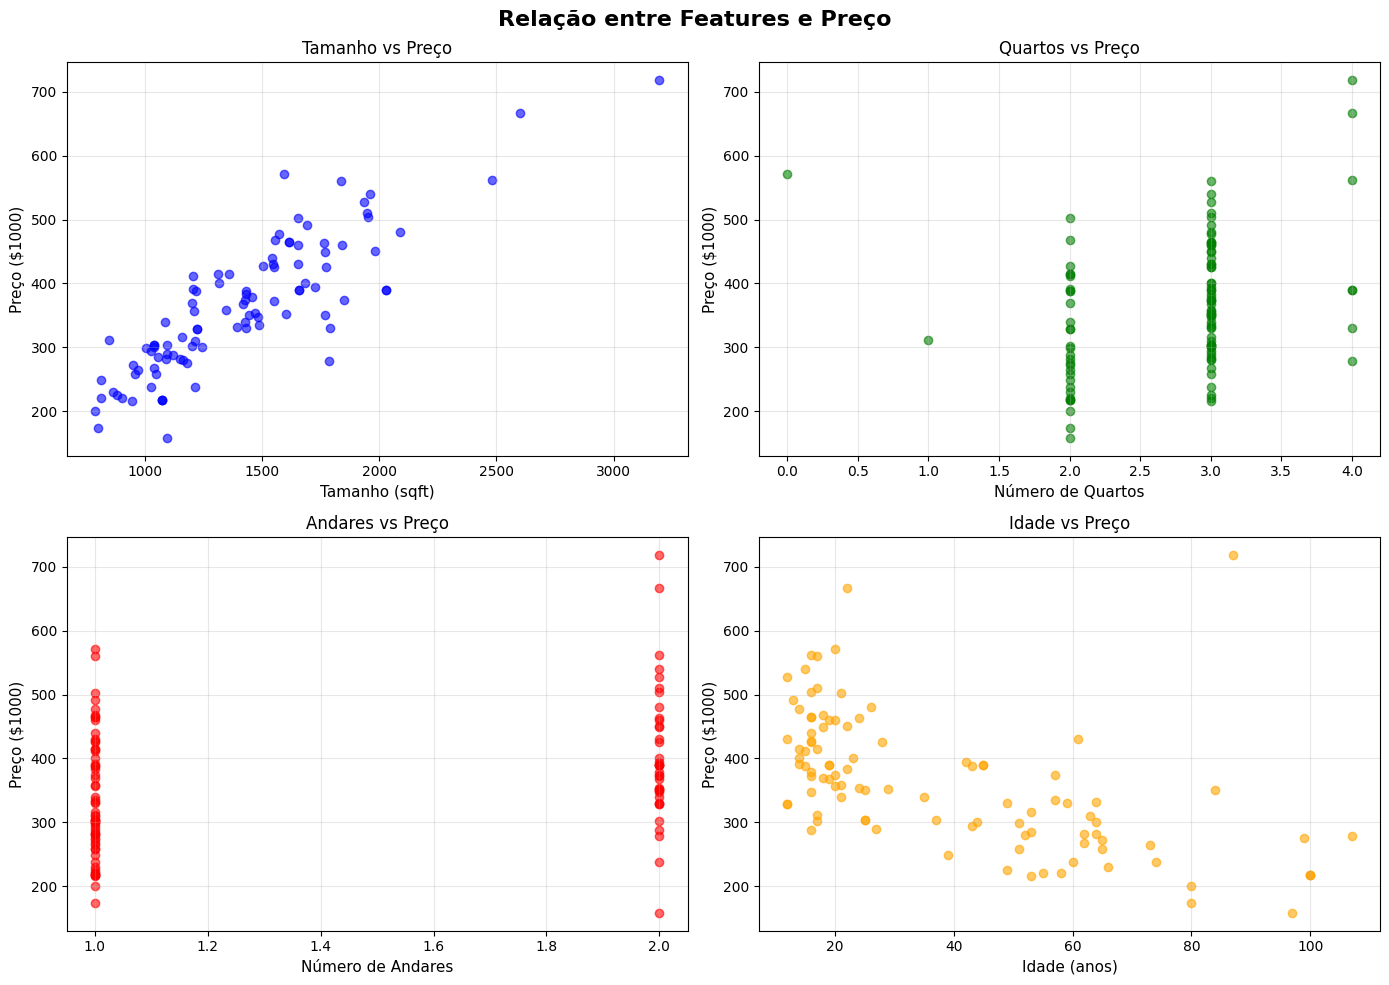


MATRIZ DE CORRELAÇÃO


,size (sqft),bedrooms,floors,age,price ($1000)
size (sqft),1.000000,0.559600,0.601611,-0.270278,0.856714
bedrooms,0.559600,1.000000,0.379457,-0.057138,0.290104
floors,0.601611,0.379457,1.000000,-0.199509,0.319732
age,-0.270278,-0.057138,-0.199509,1.000000,-0.575884
price ($1000),0.856714,0.290104,0.319732,-0.575884,1.000000


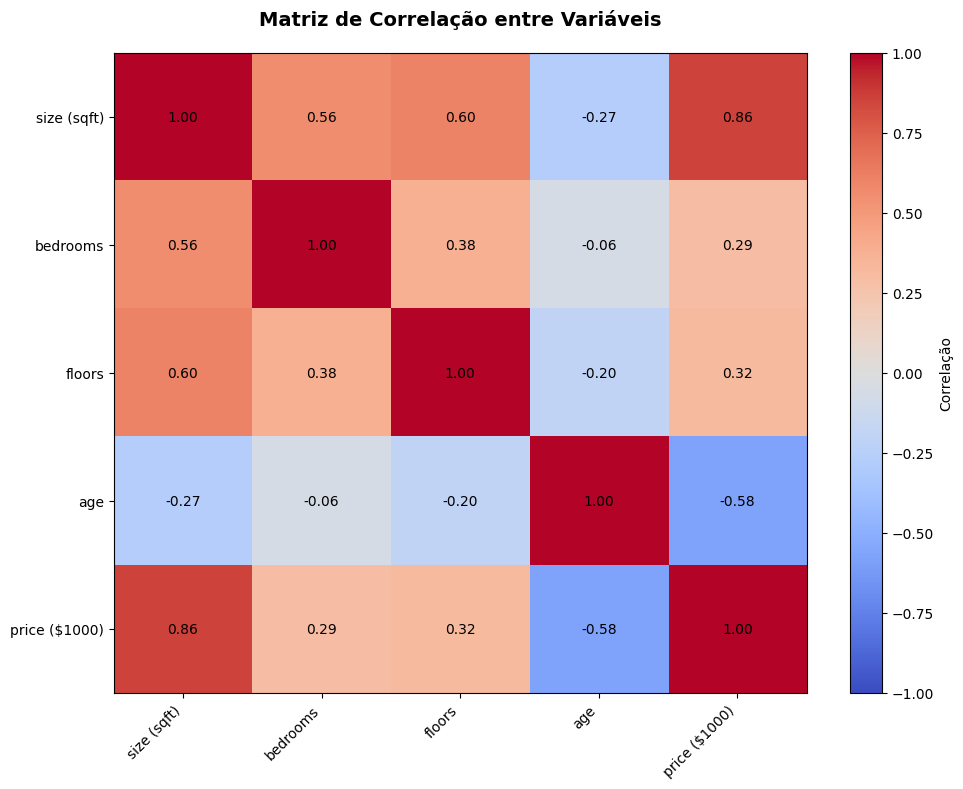

In [5]:
# Inspecionando a estrutura dos dados
print("=" * 60)
print("PRIMEIRAS LINHAS DO DATASET")
print("=" * 60)
display(data.head(10))

print("\n" + "=" * 60)
print("INFORMAÇÕES GERAIS")
print("=" * 60)
data.info()

print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 60)
display(data.describe())

print("\n" + "=" * 60)
print("DIMENSÕES DO DATASET")
print("=" * 60)
print(f"Shape: {data.shape} (linhas x colunas)")
print(f"Número de exemplos: {data.shape[0]}")
print(f"Número de features: {data.shape[1] - 1}")

# Visualizando as relações entre as variáveis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relação entre Features e Preço', fontsize=16, fontweight='bold')

# Gráfico 1: Size vs Price
axes[0, 0].scatter(data['size (sqft)'], data['price ($1000)'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Tamanho (sqft)', fontsize=11)
axes[0, 0].set_ylabel('Preço ($1000)', fontsize=11)
axes[0, 0].set_title('Tamanho vs Preço')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Bedrooms vs Price
axes[0, 1].scatter(data['bedrooms'], data['price ($1000)'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Número de Quartos', fontsize=11)
axes[0, 1].set_ylabel('Preço ($1000)', fontsize=11)
axes[0, 1].set_title('Quartos vs Preço')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Floors vs Price
axes[1, 0].scatter(data['floors'], data['price ($1000)'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Número de Andares', fontsize=11)
axes[1, 0].set_ylabel('Preço ($1000)', fontsize=11)
axes[1, 0].set_title('Andares vs Preço')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Age vs Price
axes[1, 1].scatter(data['age'], data['price ($1000)'], alpha=0.6, color='orange')
axes[1, 1].set_xlabel('Idade (anos)', fontsize=11)
axes[1, 1].set_ylabel('Preço ($1000)', fontsize=11)
axes[1, 1].set_title('Idade vs Preço')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Matriz de correlação
print("\n" + "=" * 60)
print("MATRIZ DE CORRELAÇÃO")
print("=" * 60)
correlation_matrix = data.corr()
display(correlation_matrix)

# Visualização da matriz de correlação
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Adicionando os valores na matriz
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=10)

ax.set_title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
fig.colorbar(im, ax=ax, label='Correlação')
plt.tight_layout()
plt.show()

### 1.b) Crie a matriz de treino $X_{\rm train}$, o vetor de variáveis alvo $y_{\rm train}$ e aplique uma transformação para escalonar os dados.

_Observação: neste primeiro momento, vamos usar a função StandardScaler do scikit-learn para normalizar os dados. O que ela faz?_

DADOS ORIGINAIS
X_train shape: (100, 4)
y_train shape: (100,)

Primeiras 5 linhas de X_train:
[[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]]

Primeiros 5 valores de y_train:
[271.5 300.  509.8 394.  540. ]

DADOS ESCALONADOS (StandardScaler)
X_train_scaled shape: (100, 4)

Primeiras 5 linhas de X_train_scaled:
[[-1.12018542 -1.08793896 -0.78288136  1.02191098]
 [-0.41174475  0.44436943 -0.78288136  0.98312878]
 [ 1.29385043  0.44436943  1.27733275 -0.83963464]
 [ 0.75524143  0.44436943  1.27733275  0.12992037]
 [ 1.32296443  0.44436943  1.27733275 -0.91719904]]

Médias das features escalonadas:
  [-8.32667268e-17  2.66453526e-17  1.99840144e-16  3.55271368e-17]

Desvios padrão das features escalonadas:
  [1. 1. 1. 1.]


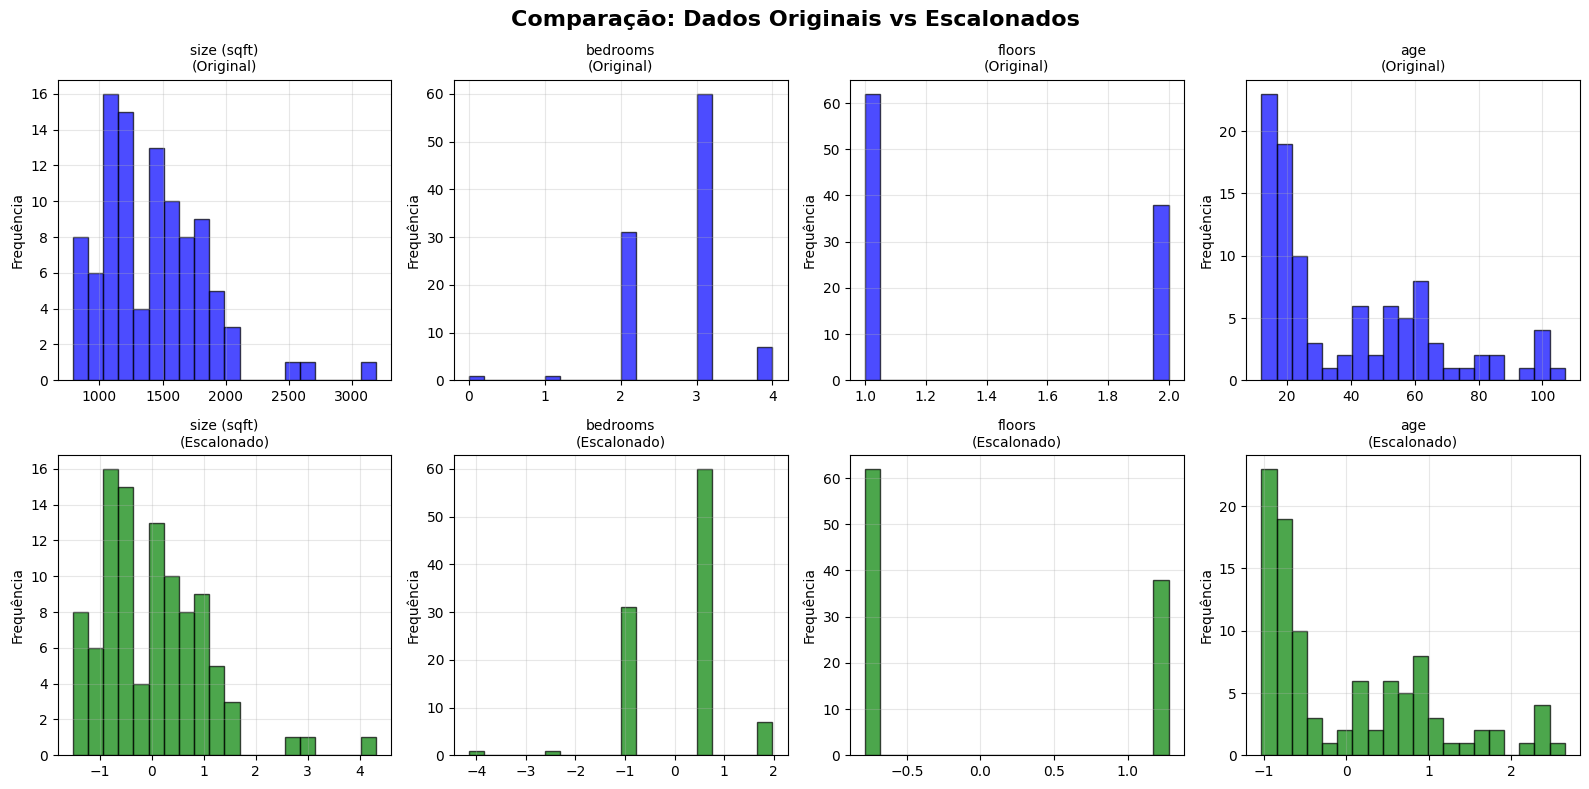

In [6]:
from sklearn.preprocessing import StandardScaler

# Matriz de treino e o vetor alvo
X_train = data[X_features].values
y_train = data[y_name].values.flatten()

print("=" * 60)
print("DADOS ORIGINAIS")
print("=" * 60)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"\nPrimeiras 5 linhas de X_train:\n{X_train[:5]}")
print(f"\nPrimeiros 5 valores de y_train:\n{y_train[:5]}")

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print("\n" + "=" * 60)
print("DADOS ESCALONADOS (StandardScaler)")
print("=" * 60)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"\nPrimeiras 5 linhas de X_train_scaled:\n{X_train_scaled[:5]}")

# Verificando as estatísticas dos dados escalonados
print(f"\nMédias das features escalonadas:")
print(f"  {X_train_scaled.mean(axis=0)}")
print(f"\nDesvios padrão das features escalonadas:")
print(f"  {X_train_scaled.std(axis=0)}")

# Visualizando o efeito do escalonamento
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Comparação: Dados Originais vs Escalonados', fontsize=16, fontweight='bold')

for i, feature in enumerate(X_features):
    # Dados originais
    axes[0, i].hist(X_train[:, i], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[0, i].set_title(f'{feature}\n(Original)', fontsize=10)
    axes[0, i].set_ylabel('Frequência')
    axes[0, i].grid(True, alpha=0.3)
    
    # Dados escalonados
    axes[1, i].hist(X_train_scaled[:, i], bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[1, i].set_title(f'{feature}\n(Escalonado)', fontsize=10)
    axes[1, i].set_ylabel('Frequência')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# O que o StandardScaler faz?

Padroniza as features removendo a média e escalando para variância unitária (z-score normalization).
Fórmula: z = (x - μ) / σ onde μ = média e σ = desvio padrão

## Exercício 2: Regressão linear com várias variáveis - Método do gradiente ✅

O objetivo deste exercício é implementar o método do gradiente para regressão linear com várias variáveis. Relembrando as equações principais do método:

### 2.a) Implementando as funções

Será necessário definir quatro funções:
- `f_wb` define o modelo de regressão linear;
- `compute_cost` implementa a equação (2) acima;
- `compute_gradient` implementa as equações (5a) e (5b) acima;
- `gradient_descent` implementa o método do gradiente segundo as equações (3a) e (3b) acima.

In [9]:
# USAR MULTIPLICAÇÕES MATRICIAIS E/OU PRODUTOS ESCALARES COM NUMPY NESTES EXERCÍCIOS

def f_wb(X, w, b):
    """
    Computes the prediction of a linear model.

    Args:
      X (ndarray (m, n)) : data, m examples with n features each
      w (ndarray (n,))   : model weight parameters
      b (scalar)         : model bias parameter
    Returns
      y (ndarray (m,))   : target values
    """

    y = X @ w + b

    return y


def compute_cost(X, y, w, b):
    """
    Computes the cost $J(\vec{w}, b)$ for a linear regression model.

    Args:
      X (ndarray (m, n)): Data, m examples with n features each
      y (ndarray (m,))  : target values
      w (ndarray (n,))  : model weight parameters
      b (scalar)        : model bias parameter

    Returns:
      cost (scalar): cost
    """
    
    m = X.shape[0]
    predictions = f_wb(X, w, b)
    squared_errors = (predictions - y) ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)

    return cost


def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m, n)): Data, m examples with n features each
      y (ndarray (m,))  : target values
      w (ndarray (n,))  : model weight parameters
      b (scalar)        : model bias parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    
    m = X.shape[0]
    
    # modelo
    predictions = f_wb(X, w, b)
    error = predictions - y
    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db


def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m, n)) : Data, m examples with n features each
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): initial model weight parameters
      b_in (scalar)      : initial model bias parameter
      alpha (float)      : Learning rate
      num_iters (int)    : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))                   : Updated values of parameters
      b (scalar)                         : Updated value of parameter
      J_history (ndarray (num_iters,))   : History of cost values
      w_history (ndarray (num_iters, n)) : History of parameters w
      b_history (ndarray (num_iters,))   : History of parameters b
      """

    J_history = []
    w_history = []
    b_history = []
    w = w_in.copy()
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        w_history.append(w.copy())
        b_history.append(b)

    return w, b, J_history, w_history, b_history

### 2.b) Treine o modelo, faça previsões e inspecione graficamente os resultados

Faça a regressão linear nos dados e verifique graficamente que o comportamento da função de custo está como o esperado.

Parâmetros iniciais:
  w_init: [0. 0. 0. 0.]
  b_init: 0
  alpha: 0.01
  iterations: 1000

Parâmetros finais após 1000 iterações:
  w_final: [107.61300784 -19.98576799 -30.96395524 -38.35125229]
  b_final: 362.22
  Custo final: 222.10
Primeiras 10 previsões vs valores reais:


,Real,Previsto,Erro
0,271.5,248.470192,23.029808
1,300.0,295.570610,4.429390
2,509.8,485.227720,24.572280
3,394.0,390.082736,3.917264
4,540.0,491.335457,48.664543
5,415.0,418.838364,3.838364
6,230.0,224.007182,5.992818
7,560.0,520.039430,39.960570
8,294.0,269.887888,24.112112
9,718.2,676.064749,42.135251



Métricas de Desempenho:
  MSE (Mean Squared Error): 444.20
  RMSE (Root Mean Squared Error): 21.08
  MAE (Mean Absolute Error): 16.88
  R² Score: 0.9590


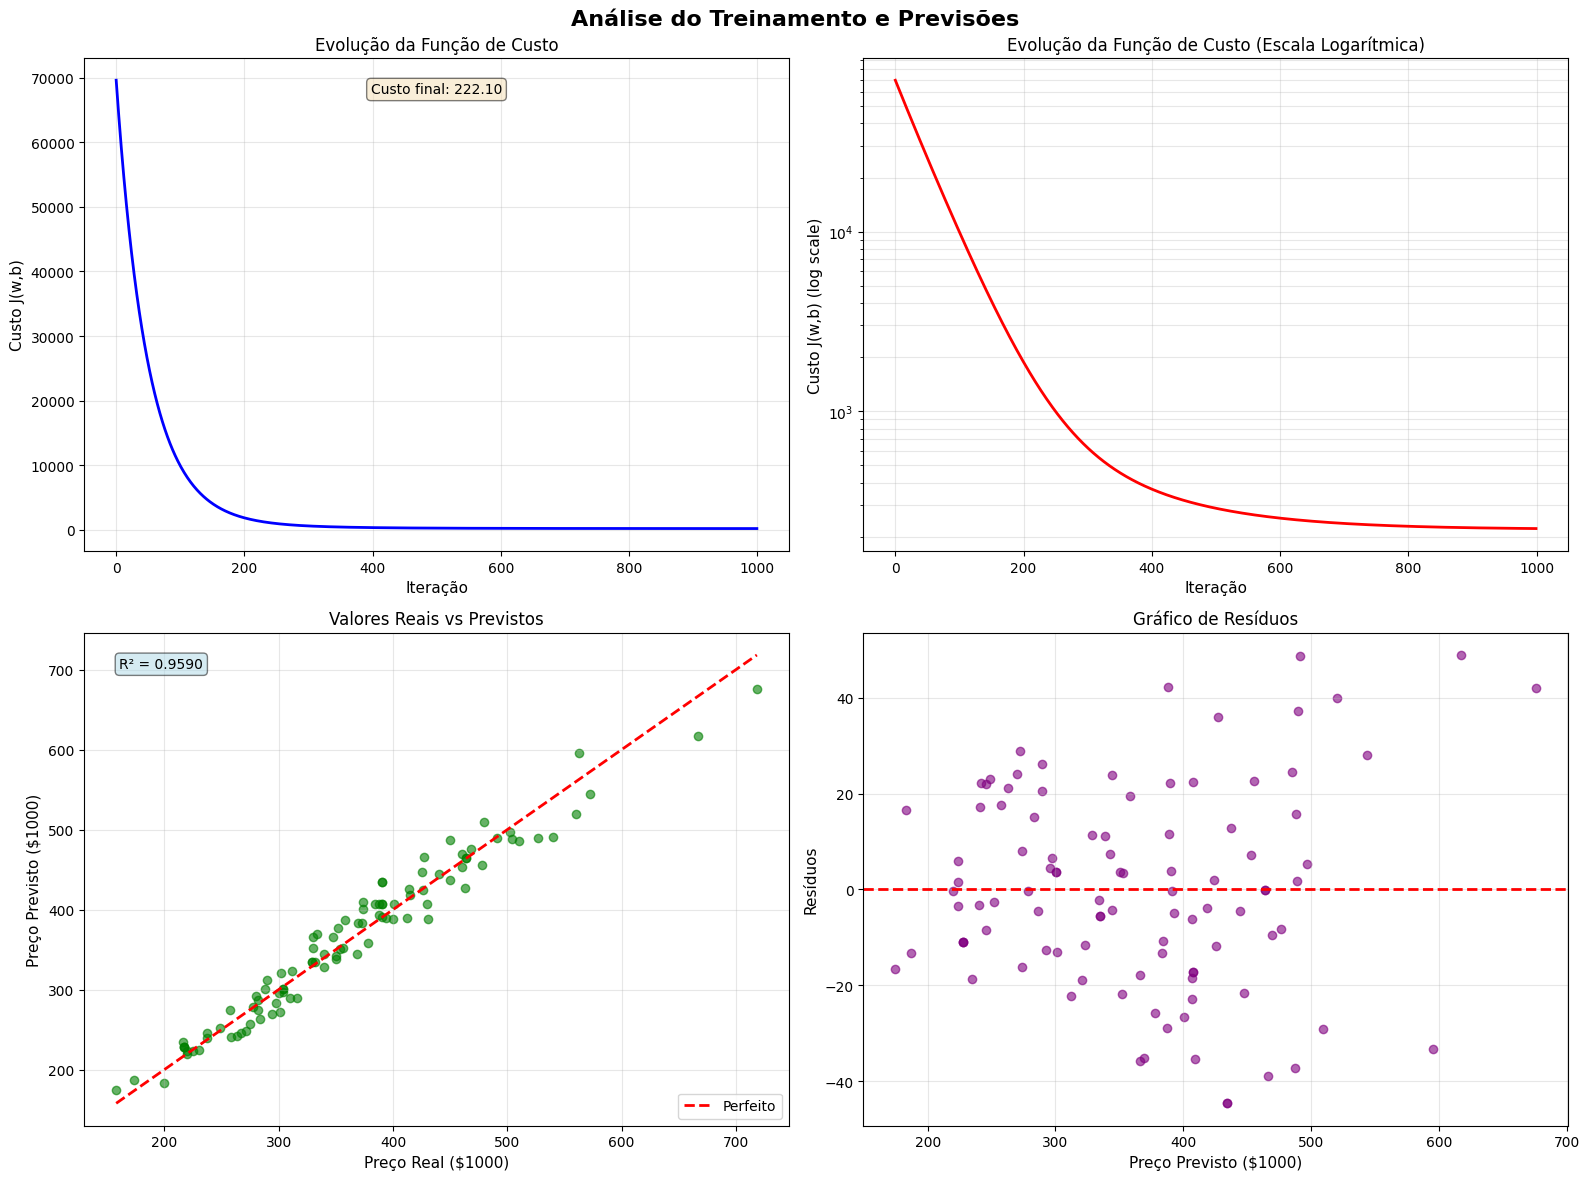

In [10]:
n_features = X_train_scaled.shape[1]
w_init = np.zeros(n_features)
b_init = 0

alpha = 0.01  # Taxa de aprendizado
iterations = 1000

print(f"Parâmetros iniciais:")
print(f"  w_init: {w_init}")
print(f"  b_init: {b_init}")
print(f"  alpha: {alpha}")
print(f"  iterations: {iterations}")

w_final, b_final, J_history, w_history, b_history = gradient_descent(
    X_train_scaled, y_train, w_init, b_init, alpha, iterations
)

print(f"\nParâmetros finais após {iterations} iterações:")
print(f"  w_final: {w_final}")
print(f"  b_final: {b_final:.2f}")
print(f"  Custo final: {J_history[-1]:.2f}")

y_pred = f_wb(X_train_scaled, w_final, b_final)


print(f"Primeiras 10 previsões vs valores reais:")
comparison = pd.DataFrame({
    'Real': y_train[:10],
    'Previsto': y_pred[:10],
    'Erro': np.abs(y_train[:10] - y_pred[:10])
})
display(comparison)

mse = np.mean((y_pred - y_train) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_train))
r2 = 1 - (np.sum((y_train - y_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

print(f"\nMétricas de Desempenho:")
print(f"  MSE (Mean Squared Error): {mse:.2f}")
print(f"  RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"  MAE (Mean Absolute Error): {mae:.2f}")
print(f"  R² Score: {r2:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise do Treinamento e Previsões', fontsize=16, fontweight='bold')

# Gráfico 1: Evolução da função de custo
axes[0, 0].plot(J_history, linewidth=2, color='blue')
axes[0, 0].set_xlabel('Iteração', fontsize=11)
axes[0, 0].set_ylabel('Custo J(w,b)', fontsize=11)
axes[0, 0].set_title('Evolução da Função de Custo')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.5, 0.95, f'Custo final: {J_history[-1]:.2f}', 
                transform=axes[0, 0].transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Gráfico 2: Custo (escala log)
axes[0, 1].plot(J_history, linewidth=2, color='red')
axes[0, 1].set_xlabel('Iteração', fontsize=11)
axes[0, 1].set_ylabel('Custo J(w,b) (log scale)', fontsize=11)
axes[0, 1].set_title('Evolução da Função de Custo (Escala Logarítmica)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3, which='both')

# Gráfico 3: Valores reais vs previstos
axes[1, 0].scatter(y_train, y_pred, alpha=0.6, color='green')
axes[1, 0].plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 
                'r--', linewidth=2, label='Perfeito')
axes[1, 0].set_xlabel('Preço Real ($1000)', fontsize=11)
axes[1, 0].set_ylabel('Preço Previsto ($1000)', fontsize=11)
axes[1, 0].set_title('Valores Reais vs Previstos')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].text(0.05, 0.95, f'R² = {r2:.4f}', 
                transform=axes[1, 0].transAxes, ha='left', va='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Gráfico 4: Distribuição dos resíduos
residuals = y_train - y_pred
axes[1, 1].scatter(y_pred, residuals, alpha=0.6, color='purple')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Preço Previsto ($1000)', fontsize=11)
axes[1, 1].set_ylabel('Resíduos', fontsize=11)
axes[1, 1].set_title('Gráfico de Resíduos')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercício 3: Regressão linear com várias variáveis - Scikit-learn ✅


O objetivo deste exercício é obter os memos resultados do exercício acima usando a funcionalidade já existente no scikit-learn (SGDRegressor e LinearRegression).


### Exercício 3a: Treine o modelo com o método do gradiente, faça previsões e compare graficamente com os preços fornecidos. ✅

Número de iterações realizadas: 106
  w: [109.84733119 -21.07797534 -32.26154151 -37.92509469]
  b: 362.24
  w_manual: [107.61300784 -19.98576799 -30.96395524 -38.35125229]
  b_manual: 362.22
  MSE: 439.73
  RMSE: 20.97
  R² Score: 0.9594


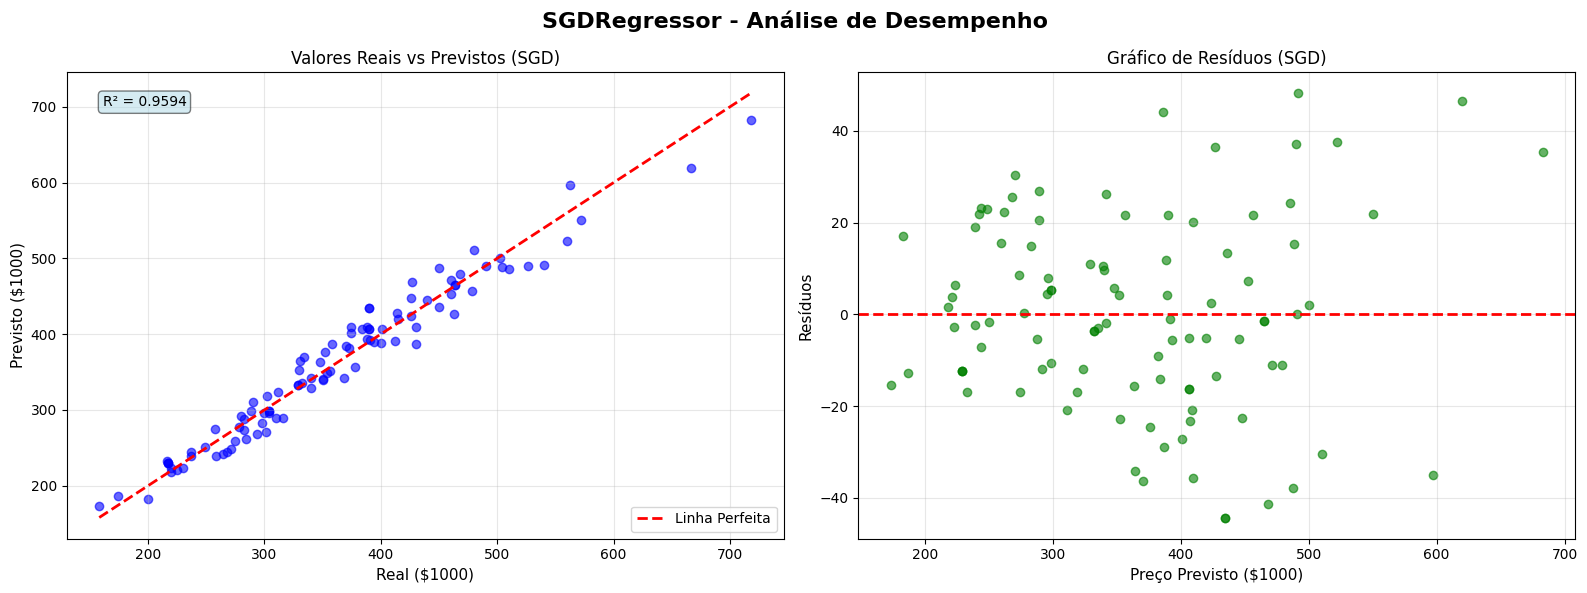

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

print(f"Número de iterações realizadas: {sgd_model.n_iter_}")

y_pred_sgd = sgd_model.predict(X_train_scaled)
b_norm_sgd = sgd_model.intercept_
w_norm_sgd = sgd_model.coef_

print(f"  w: {w_norm_sgd}")
print(f"  b: {b_norm_sgd[0]:.2f}")
print(f"  w_manual: {w_final}")
print(f"  b_manual: {b_final:.2f}")

mse_sgd = np.mean((y_pred_sgd - y_train) ** 2)
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = sgd_model.score(X_train_scaled, y_train)

print(f"  MSE: {mse_sgd:.2f}")
print(f"  RMSE: {rmse_sgd:.2f}")
print(f"  R² Score: {r2_sgd:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('SGDRegressor - Análise de Desempenho', fontsize=16, fontweight='bold')

# Gráfico 1: Valores reais vs previstos
axes[0].scatter(y_train, y_pred_sgd, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], 
			 [y_train.min(), y_train.max()], 
			 'r--', linewidth=2, label='Linha Perfeita')
axes[0].set_xlabel('Real ($1000)', fontsize=11)
axes[0].set_ylabel('Previsto ($1000)', fontsize=11)
axes[0].set_title('Valores Reais vs Previstos (SGD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2_sgd:.4f}', 
			 transform=axes[0].transAxes, ha='left', va='top',
			 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Gráfico 2: Resíduos
residuals_sgd = y_train - y_pred_sgd
axes[1].scatter(y_pred_sgd, residuals_sgd, alpha=0.6, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Preço Previsto ($1000)', fontsize=11)
axes[1].set_ylabel('Resíduos', fontsize=11)
axes[1].set_title('Gráfico de Resíduos (SGD)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Exercício 3b: Repita o processo acima usando a implementação analítica fornecida pelo scikit-learn ✅


Parâmetros do modelo (LinearRegression):
  w: [110.61335173 -21.47323884 -32.66070323 -37.77938362]
  b: 362.24

Métricas de Desempenho (LinearRegression):
  MSE: 439.42
  RMSE: 20.96
  R² Score: 0.9594


,MSE,RMSE,R² Score,Modelo
0,444.195456,21.075945,0.958987,Manual GD
1,439.728610,20.969707,0.959400,SGDRegressor
2,439.422604,20.962409,0.959428,LinearRegression


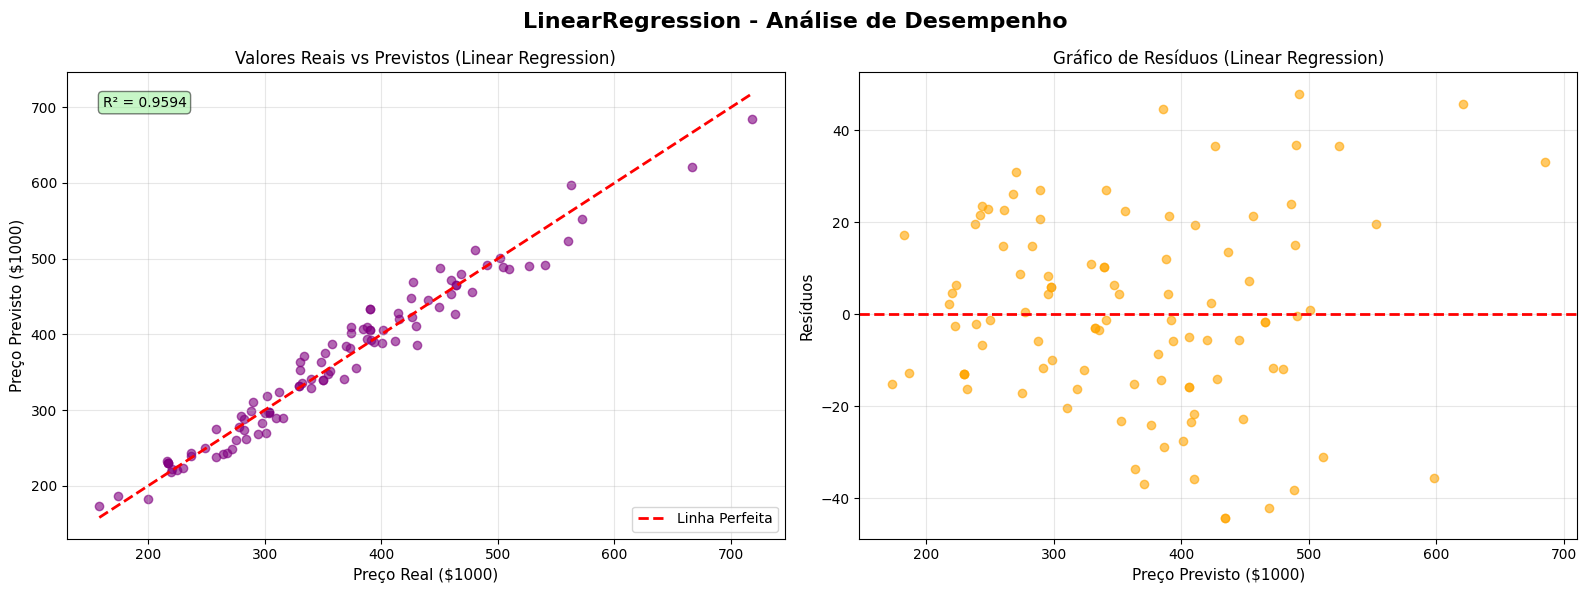

In [16]:
from sklearn.linear_model import LinearRegression


# Criando e treinando o modelo LinearRegression (Equação Normal)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_train_scaled)
b_norm = lr_model.intercept_
w_norm = lr_model.coef_

print(f"\nParâmetros do modelo (LinearRegression):")
print(f"  w: {w_norm}")
print(f"  b: {b_norm:.2f}")


# Métricas de desempenho
mse_lr = np.mean((y_pred_lr - y_train) ** 2)
rmse_lr = np.sqrt(mse_lr)
r2_lr = lr_model.score(X_train_scaled, y_train)

print(f"\nMétricas de Desempenho (LinearRegression):")
print(f"  MSE: {mse_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R² Score: {r2_lr:.4f}")

comparison_df = pd.DataFrame({
    'MSE': [mse, mse_sgd, mse_lr],
    'RMSE': [rmse, rmse_sgd, rmse_lr],
    'R² Score': [r2, r2_sgd, r2_lr],
    'Modelo': ['Manual GD', 'SGDRegressor', 'LinearRegression']
})
display(comparison_df)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('LinearRegression - Análise de Desempenho', fontsize=16, fontweight='bold')

# Gráfico 1: Valores reais vs previstos
axes[0].scatter(y_train, y_pred_lr, alpha=0.6, color='purple')
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Linha Perfeita')
axes[0].set_xlabel('Preço Real ($1000)', fontsize=11)
axes[0].set_ylabel('Preço Previsto ($1000)', fontsize=11)
axes[0].set_title('Valores Reais vs Previstos (Linear Regression)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2_lr:.4f}', 
             transform=axes[0].transAxes, ha='left', va='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# Gráfico 2: Resíduos
residuals_lr = y_train - y_pred_lr
axes[1].scatter(y_pred_lr, residuals_lr, alpha=0.6, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Preço Previsto ($1000)', fontsize=11)
axes[1].set_ylabel('Resíduos', fontsize=11)
axes[1].set_title('Gráfico de Resíduos (Linear Regression)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercício 4: Feature scaling ✅


O objetivo deste exercício é reescalonar as features usando a técnica de normalização por z-score, rodar novamente a regressão linear com o método do gradiente e checar que o resultado continua correto.


### Normalização por z-score

Após a normalização por *z-score*, todas as *features* passam a ter média 0 e desvio-padrão 1.

Para implementar a normalização por *z-score*, ajuste seus valores de entrada conforme a fórmula:

$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$

onde \$j\$ seleciona uma *feature* (coluna) na matriz \$\mathbf{X}\$. \$\mu\_j\$ é a média de todos os valores da *feature* \$j\$ e \$\sigma\_j\$ é o desvio-padrão da *feature* \$j\$.

$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

> **Observação de implementação:** Ao normalizar as *features*, é importante armazenar os valores usados na normalização — a média e o desvio-padrão utilizados nos cálculos. Depois de ajustar os parâmetros do modelo, muitas vezes queremos prever os preços de casas que ainda não vimos. Dado um novo vetor \$\mathbf{x}\$ (por exemplo, área da sala de estar e número de quartos), primeiro devemos normalizá-lo usando a mesma média e o mesmo desvio-padrão previamente calculados a partir do conjunto de treinamento.

### 4a) Implemente a normalização por z-score, aplique nos dados e compare as distribuições graficamente

_Dica: para a representação gráfica, use a função 'hist' da biblioteca matplotlib para cada uma das features, antes e depois da normalização_

X_mu = [1.41371e+03 2.71000e+00 1.38000e+00 3.86500e+01], 
X_sigma = [412.17283499   0.65261014   0.48538644  25.78502472]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


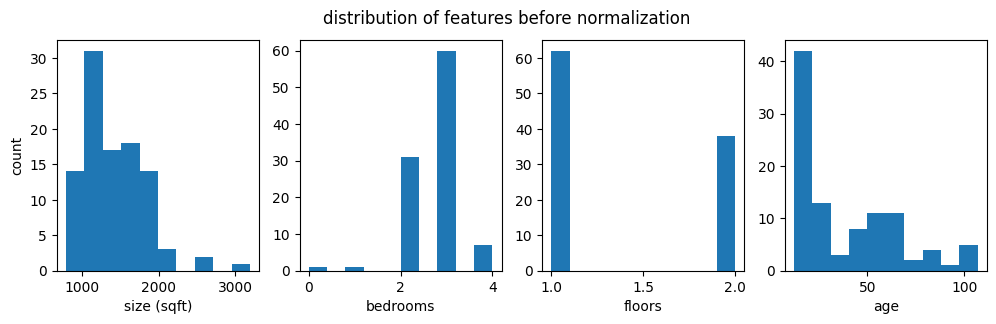

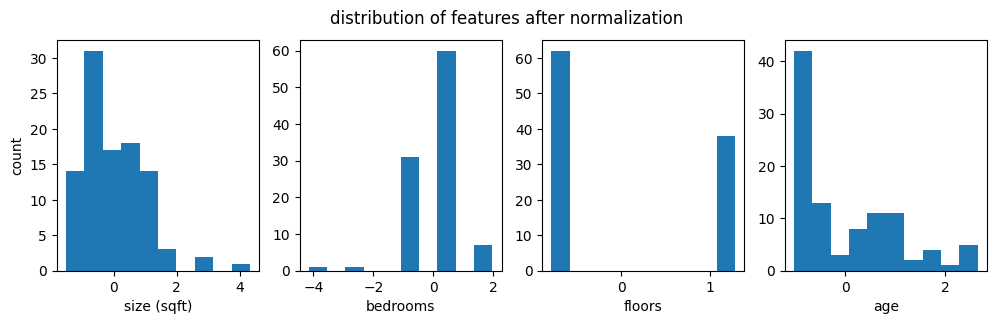

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

    # ---- INSIRA SEU CÓDIGO AQUI
    # ...
    # ----

    return (X_norm, mu, sigma)


## Renormalizando os dados e comparando com os valores originais
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

## Figuras
# ---- INSIRA SEU CÓDIGO AQUI
# ...
# ----

### 4b) Repita o reescalonamento com a função 'scale' da biblioteca scikit-learn

In [ ]:

# ---- INSIRA SEU CÓDIGO AQUI
# ...

## Checando a faixa de valores
print(f"Peak to Peak range by column (with Scikit-Learn):{np.ptp(X_norm_sklearn, axis=0)}")
# ----


Peak to Peak range by column (with Scikit-Learn):[5.83735704 6.12923357 2.06021411 3.68430905]


## Exercício 5: Regressão polinomial

A regressão linear oferece um meio de construir modelos da forma:

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1 + ... + w_{n-1}x_{n-1} + b \tag{1}$$

Mas e se as relações entre as *features* e os alvos forem não-lineares? Como podemos usar o mecanismo da regressão linear para ajustar essa curva? Lembre-se de que o “mecanismo” de que dispomos é a capacidade de modificar os parâmetros $\mathbf{w}$, $\mathbf{b}$ em (1) para “ajustar” a equação aos dados de treinamento. Entretanto, nenhum ajuste de $\mathbf{w}$, $\mathbf{b}$ em (1) alcançará um ajuste a uma curva não linear.


In [ ]:
# Geração de dados simplificados para este problema
x = np.arange(0 ,20, 1)
y_train = 1 + x**2
X_train = x.reshape(-1, 1)

### 5a) Ajuste um modelo de regressão linear somente com a feature $x$ e compare graficamente as previsões do modelo com os dados.

_Orientações: use o objeto SGDRegressor da biblioteca Scikit-learn_

In [ ]:
# ---- INSIRA SEU CÓDIGO AQUI
# ...
# ----

### 5b) Refaça o ajuste usando features polinomiais até a ordem 3 e compare os valores do melhor modelo com o valor esperado.

_Orientações:_
- _para criar as novas features polinomias, use a função 'np.c\_' do numpy ou a função 'sklearn.preprocessing.PolynomialFeatures' do scikit-learn;_
- _problemas de ordem de grandeza relativa entre features se tornam ainda mais sérios ao manipularmos as variáveis. Não esqueca de aplicar uma normalização por z-score antes de treinar o modelo;_
- _verifique que o treino convergiu apropriadamente._

In [ ]:
# ---- INSIRA SEU CÓDIGO AQUI
X_train = # Crie as features aqui.
# ...
# ----

SyntaxError: invalid syntax (ipython-input-3135942336.py, line 2)